In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import datetime as dt
import warnings

# Ignore FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
df=pd.read_csv(r"C:\Users\Ganesh Jaiswar\Desktop\ODINSCHOOL\EDA AND ML\Clustering\archive (3)\customer_segmentation.csv")

pd.set_option("display.max_columns",None)
df

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
0            0  04-09-2012       58       635         88              546   
1            1  08-03-2014       38        11          1                6   
2            0  21-08-2013       26       426         49              127   
3            0  10-02-2014       26        11          4               20   
4            0  19-01-2014       94       173         43              118   
...        ...         ...      ...       ...        ...              ...   
2235         1  13-06-2013       46       709         43              182   
2236         1  10-06-2014       56       406          0               30   
2237         0  25-01-2014       91       908         48              217   
2238         1  24-01-2014        8       428         30              214   
2239         1  15-10-2012       40        84          3               61   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
0                 172                88            88                  3   
1                   2                 1             6                  2   
2                 111                21            42                  1   
3                  10                 3             5                  2   
4                  46                27            15                  5   
...               ...               ...           ...                ...   
2235               42               118           247                  2   
2236                0                 0             8                  7   
2237               32                12            24                  1   
2238               80                30            61                  2   
2239                2                 1            21                  3   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0                   8                   10                  4   
1                   1                    1                  2   
2                   8                    2                 10   
3                   2                    0                  4   
4                   5                    3                  6   
...               ...                  ...                ...   
2235                9                    3                  4   
2236                8                    2                  5   
2237                2                    3                 13   
2238                6                    5                 10   
2239                3                    1                  4   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
0                     7             0             0             0   
1                     5             0             0             0   
2                     4             0             0             0   
3                     6             0             0             0   
4                     5             0             0             0   
...                 ...           ...           ...           ...   
2235                  5             0     

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [4]:
df.shape

(2240, 29)

In [5]:
a=df['Income'].median()
df['Income'].fillna(a,inplace=True)

In [6]:
df.isnull().sum()


ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [7]:
df['Year_Birth']=pd.to_datetime(df['Year_Birth'],format='%Y')

In [8]:
df['Year_Births']=df['Year_Birth'].dt.year

In [9]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')

In [10]:
df['dt_quarter']=df['Dt_Customer'].dt.month

In [11]:
# Calculating age of customers
current_year = dt.datetime.now().year
df['Age'] = current_year - df['Year_Births']

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   datetime64[ns]
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2240 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [13]:
categorical_data=df.select_dtypes('object')
categorical_data

Education Marital_Status
0     Graduation         Single
1     Graduation         Single
2     Graduation       Together
3     Graduation       Together
4            PhD        Married
...          ...            ...
2235  Graduation        Married
2236         PhD       Together
2237  Graduation       Divorced
2238      Master       Together
2239         PhD        Married

[2240 rows x 2 columns]

In [14]:
count=df['Education'].value_counts()
index=count.index
print(count)
print('-'*45)
print(index)

Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64
---------------------------------------------
Index(['Graduation', 'PhD', 'Master', '2n Cycle', 'Basic'], dtype='object', name='Education')


([0, 1, 2, 3, 4],
 [Text(0, 0, 'Graduation'),
  Text(1, 0, 'PhD'),
  Text(2, 0, 'Master'),
  Text(3, 0, '2n Cycle'),
  Text(4, 0, 'Basic')])

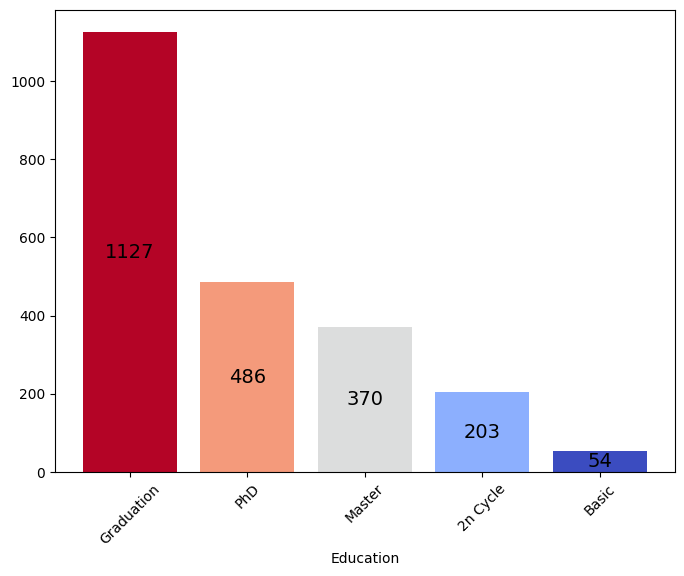

In [15]:
plt.figure(figsize=(8,6))
bar_plot=plt.bar(x=index,height=count,width=0.8,color=plt.cm.coolwarm_r(np.linspace(0,1,len(index))))
plt.bar_label(bar_plot,labels=count,label_type='center',color='black',fontsize=14)
plt.xlabel('Education')
plt.xticks(rotation=45)

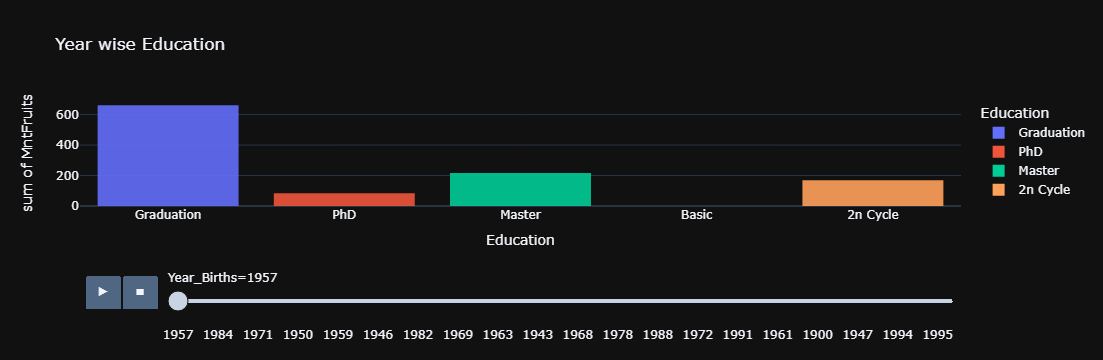

In [16]:
px.histogram(data_frame=df,x='Education',y='MntFruits',animation_frame='Year_Births',
             color='Education',barmode='relative',height=500,title='Year wise Education',
             labels={'MntWines': 'Wine Expenditure'},template='plotly_dark',opacity=0.9)

# Encoding Method

In [17]:
from sklearn.preprocessing import LabelEncoder
encd=LabelEncoder()
for i in categorical_data:
    df[i]=encd.fit_transform(df[i])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   datetime64[ns]
 2   Education            2240 non-null   int32         
 3   Marital_Status       2240 non-null   int32         
 4   Income               2240 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [18]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Year_Births', 'dt_quarter', 'Age'],
      dtype='object')

# We can create category based on the features.

In [19]:
# Each Family Details with their family status
Life_style = df[['Education','Marital_Status','Income','Kidhome','Teenhome']]

In [20]:
# Segment customers based on their spending on different product categories like wines, meats, etc.
Amount_Spent = df[['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']]

In [21]:
# Classify customers based on their engagement behaviors such as web visits and campaign responses.
No_of_purchase = df[['NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth']]

# Exploratory Data Analysis Of Life Style

In [22]:
# EDA of Lifestyle concerning Marital_Status
count=df['Education'].value_counts()
index=count.index
print(count)
print('-'*45)
print(index)

Education
2    1127
4     486
3     370
0     203
1      54
Name: count, dtype: int64
---------------------------------------------
Index([2, 4, 3, 0, 1], dtype='int32', name='Education')


Text(0.5, 0, 'Education')

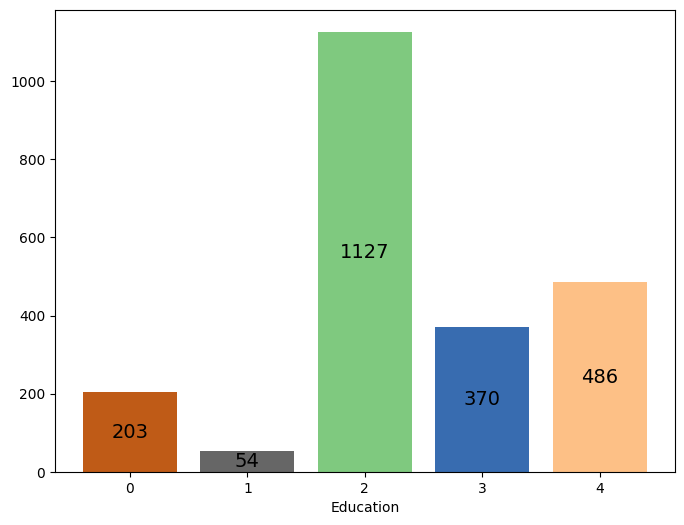

In [23]:
plt.figure(figsize=(8,6))
bar_plot=plt.bar(x=index,height=count,width=0.8,color=plt.cm.Accent(np.linspace(0,1,len(index))))
plt.bar_label(bar_plot,labels=count,label_type='center',color='black',fontsize=14)
plt.xlabel('Education')

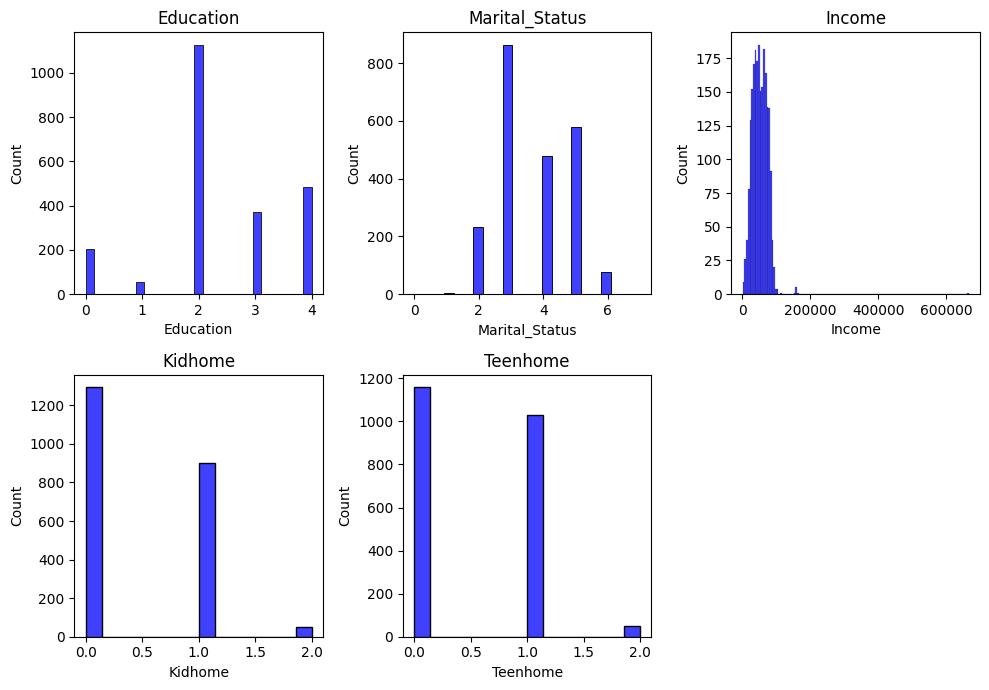

In [24]:
plt.figure(figsize=(10,7))
n=0
for i in Life_style:
    n+=1
    plt.subplot(2,3,n)
    sns.histplot(df[i],color='b')
    plt.title(i)
plt.tight_layout()
plt.show()

# Exploratory Data Analysis Of Amount Spent

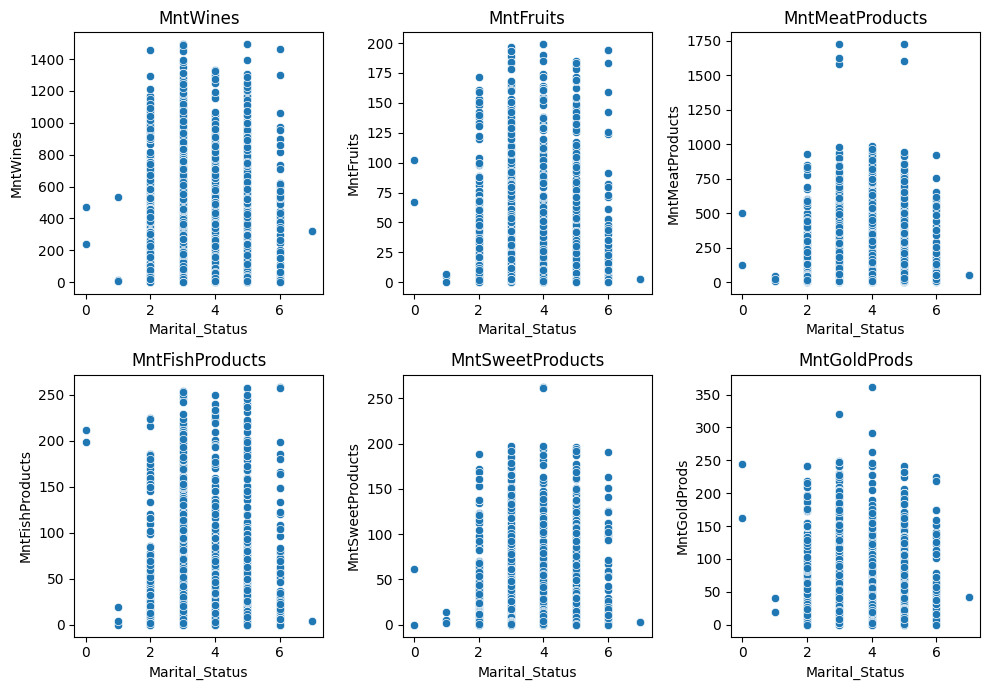

In [25]:
plt.figure(figsize=(10,7))
n=0
for i in Amount_Spent :
    n+=1
    plt.subplot(2,3,n)
    sns.scatterplot(data=df,y=df[i],x='Marital_Status')
    plt.title(i)
plt.tight_layout()
plt.show()

# Exploratory Data Analysis Of No of purchase

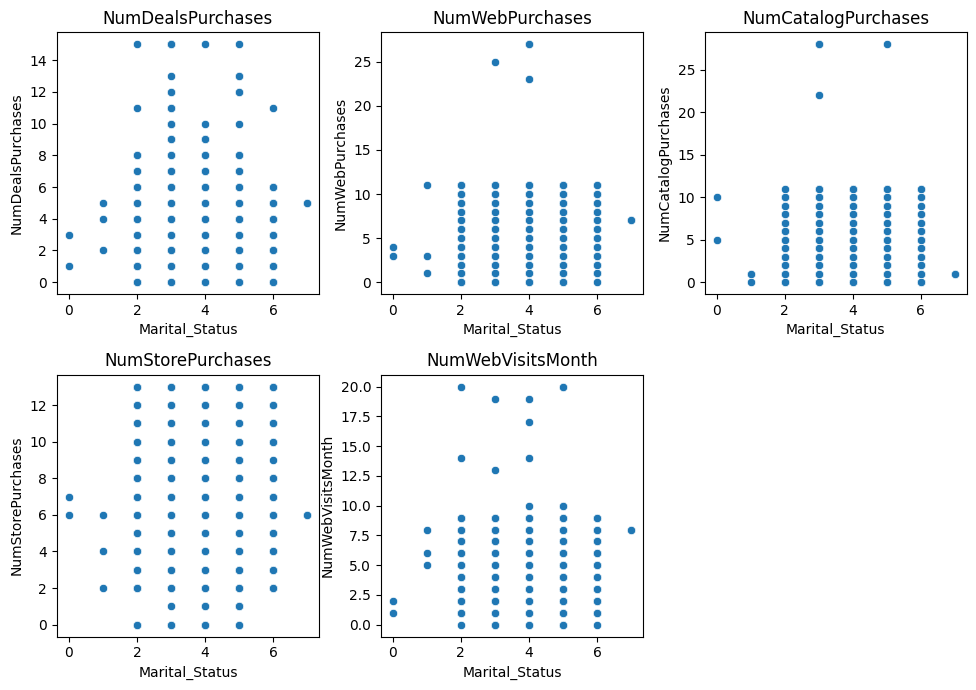

In [26]:
plt.figure(figsize=(10,7))
n=0
for i in No_of_purchase :
    n+=1
    plt.subplot(2,3,n)
    sns.scatterplot(data=df,y=df[i],x='Marital_Status')
    plt.title(i)
plt.tight_layout()
plt.show()

# Feature Scaling

In [32]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['Education','Marital_Status','Income','Kidhome','Teenhome']]=scaler.fit_transform(df[['Education','Marital_Status','Income','Kidhome','Teenhome']])
df[['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']]=scaler.fit_transform(df[['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']])
df[['NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth']]=scaler.fit_transform(df[['NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth']])

In [34]:
df.head()

ID Year_Birth  Education  Marital_Status    Income   Kidhome  Teenhome  \
0  5524 1957-01-01  -0.350141        0.251004  0.235696 -0.825218 -0.929894   
1  2174 1954-01-01  -0.350141        0.251004 -0.235454  1.032559  0.906934   
2  4141 1965-01-01  -0.350141        1.180340  0.773999 -0.825218 -0.929894   
3  6182 1984-01-01  -0.350141        1.180340 -1.022355  1.032559 -0.929894   
4  5324 1981-01-01   1.428354       -0.678332  0.241888  1.032559 -0.929894   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  2012-09-04       58  0.983781   1.551577         1.679702         2.462147   
1  2014-03-08       38 -0.870479  -0.636301        -0.713225        -0.650449   
2  2013-08-21       26  0.362723   0.570804        -0.177032         1.345274   
3  2014-02-10       26 -0.870479  -0.560857        -0.651187        -0.503974   
4  2014-01-19       94 -0.389085   0.419916        -0.216914         0.155164   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0          1.476500      0.843207           0.349414         1.409304   
1         -0.631503     -0.729006          -0.168236        -1.110409   
2         -0.146905     -0.038766          -0.685887         1.409304   
3         -0.583043     -0.748179          -0.168236        -0.750450   
4         -0.001525     -0.556446           1.384715         0.329427   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0             2.510890          -0.550785           0.693904             0   
1            -0.568720          -1.166125          -0.130463             0   
2            -0.226541           1.295237          -0.542647             0   
3            -0.910898          -0.550785           0.281720             0   
4             0.115638           0.064556          -0.130463             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  Year_Births  dt_quarter  Age  
0              3         11         1         1957           9   67  
1              3         11         0         1954           3   70  
2              3         11         0         1965           8   59  
3              3         11         0         1984           2   40  
4              3         11         0         1981           1   43

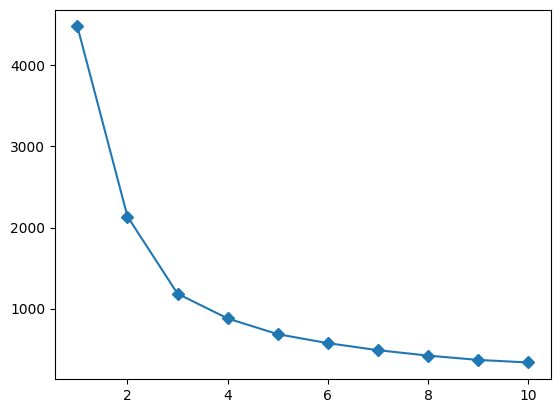

In [35]:
from sklearn.cluster import KMeans, DBSCAN
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',n_init=10)
    kmeans.fit_predict(df[['MntWines','MntFruits']])
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11),wcss,marker='D')

# Applying K Means

In [125]:
kmeans=KMeans(n_clusters=6,init='k-means++',n_init=10)
df['cluster']=kmeans.fit_predict(df[['MntWines','MntFruits']])

In [126]:
df['cluster'].value_counts()

cluster
1    1202
3     403
4     202
2     198
0     125
5     110
Name: count, dtype: int64

In [127]:
centroid =kmeans.cluster_centers_
print(centroid)

[[ 0.59236584  3.09123964]
 [-0.72931372 -0.51186143]
 [ 2.03803548 -0.15685407]
 [ 0.45720993 -0.27962249]
 [ 0.11565571  1.07227057]
 [ 1.67926412  1.40960495]]


Text(0, 0.5, 'MntFruits')

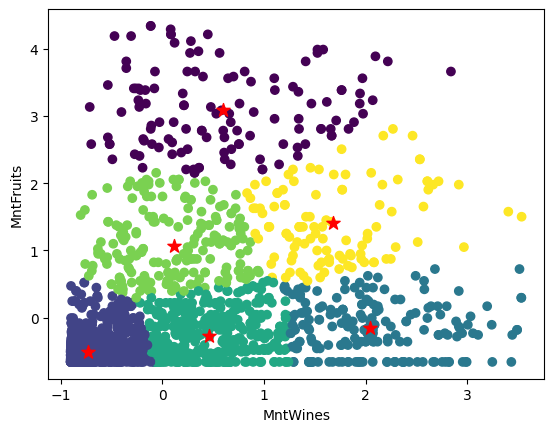

In [128]:
plt.scatter(x=df['MntWines'], y=df['MntFruits'], c=df['cluster'], cmap='viridis')
plt.scatter(x=centroid[:,0],y=centroid[:,1],c='r',s=100,marker='*')
plt.xlabel('MntWines')
plt.ylabel('MntFruits')

Text(0, 0.5, 'WCSS')

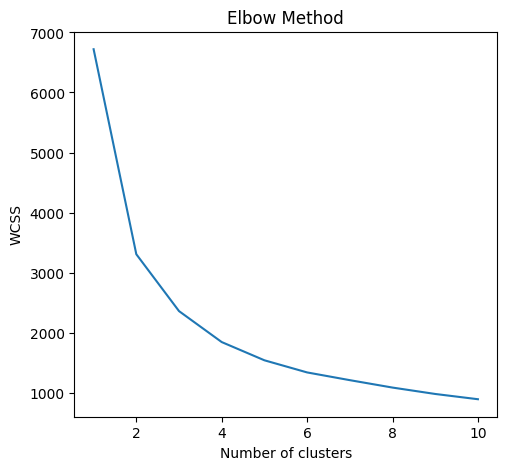

In [95]:
x=df[['MntWines','MntFruits','MntMeatProducts']]
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

# Plot the elbow method graph
plt.figure(figsize=(12, 5))

# Elbow Method plot
plt.subplot(1, 2, 1)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [182]:
kmeans_3d = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans_3d.fit_predict(x)

array([3, 0, 2, ..., 2, 2, 0])

In [183]:
df['cluster_3d'] = kmeans_3d.labels_
centroid=kmeans_3d.cluster_centers_
centroid

array([[-0.63247043, -0.4623698 , -0.54833993],
       [ 0.57190171,  2.51923959,  0.91572539],
       [ 1.22787945, -0.03189705,  0.18113659],
       [ 0.96411563,  0.55597618,  2.26395044]])

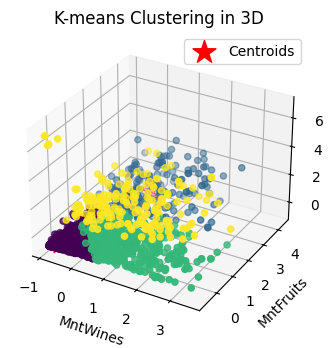

In [190]:
# its consider only 3 feature you want  more feature then use pca to reduce the dimension feature

ax = plt.subplot(1, 2, 2, projection='3d')
ax.scatter(df['MntWines'], df['MntFruits'], df['MntMeatProducts'], c=df['cluster_3d'], cmap='viridis')
ax.scatter(centroid[:, 0], centroid[:, 1], centroid[:, 2], s=300, c='red', marker='*', label='Centroids')
ax.set_xlabel('MntWines')
ax.set_ylabel('MntFruits')
ax.set_zlabel('MntMeatProducts')
ax.set_title('K-means Clustering in 3D')
plt.legend()

plt.tight_layout()
plt.show()


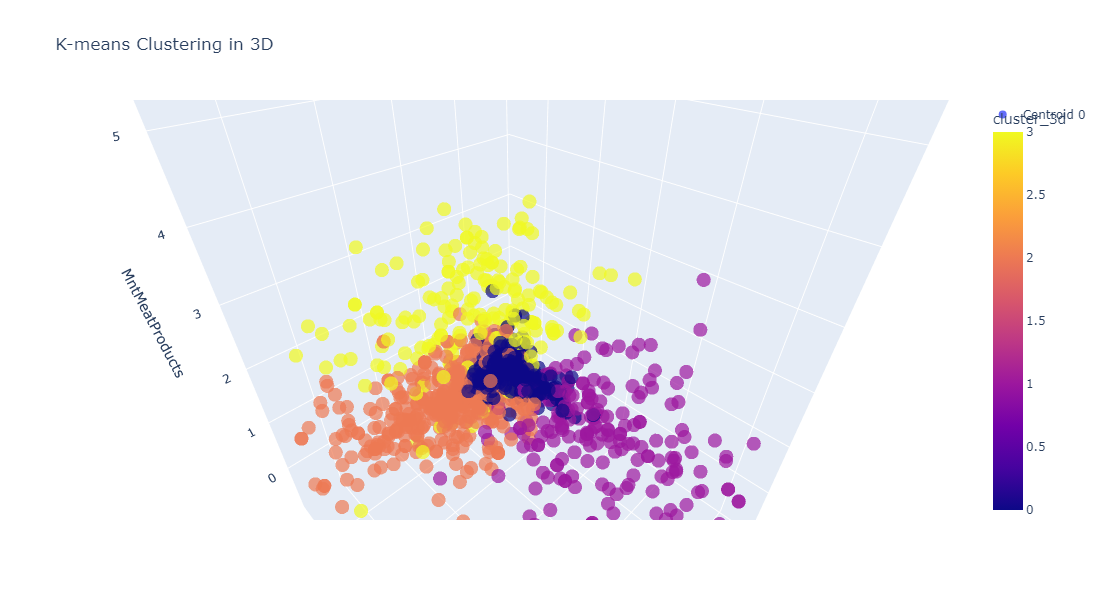

In [189]:
# its consider only more then 4 feature , only added centroid 4, centroid 5


fig = px.scatter_3d(df, x='MntWines', y='MntFruits', z='MntMeatProducts', color='cluster_3d',
                    opacity=0.7, size_max=10, width=800, height=600,
                    title='K-means Clustering in 3D')

# Add centroids to the plot
centroids_df = pd.DataFrame(kmeans_3d.cluster_centers_, columns=['MntWines', 'MntFruits', 'MntMeatProducts'])
centroids_df['Cluster'] = ['Centroid 0', 'Centroid 1', 'Centroid 2','Centroid 3']

fig.add_trace(px.scatter_3d(centroids_df, x='MntWines', y='MntFruits', z='MntMeatProducts', color='Cluster',
                            opacity=1, size_max=10).data[0])

fig.show()